<a href="https://colab.research.google.com/github/dquintani/covid/blob/main/epidemiologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive
enable this if you want to save stuff in your google colab drive, ALSO cool table display only for drive

In [1]:
#from google.colab import drive
#drive.mount("/drive")
#directory = "/drive/My Drive/Colab Notebooks/epidemiologia/"
directory = ""

#interactive table
#from vega_datasets import data
#%load_ext google.colab.data_table

# Dependencias: important!
if adding new dependency, and notebook is linked to a github workflow, you must make sure all dependencies are also on the requirements.txt too! If not, github workflow will fail and you wiill be very, very sad.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick



#other important requirements

In [3]:
orden = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']
orden

['Bolivia',
 'La Paz',
 'Cochabamba',
 'Santa Cruz',
 'Oruro',
 'Potosí',
 'Chuquisaca',
 'Tarija',
 'Beni',
 'Pando']

In [4]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
#habitantes = habitantes[habitantes.columns].apply(pd.to_numeric, errors = "coerce")

habitantes.to_csv(directory + "habitantes.csv")
habitantes


Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  Chuquisaca  \
NaN  11620000  2927000     2029000     3370000  538000  902000      637000   

     Tarija    Beni   Pando  
NaN  583000  480000  154000

# CASOS

Casos diarios y acumulados

In [5]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios = casos_diarios[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        1       0           0           1      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        7       0           1           0      6       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-06-23     2270     419         469         738     79     166   
2021-06-24     2430     457         481         900    119     107   
2021-06-25     2182     359         407         764     89     134   
2021-06-26     1653     284         396         587     67     116   
2021-06-27      922     136         268         260     66      39   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-06-23         154     148    84     13  
2021-06-24         147     132    60     27  
2021-06-25         214     116    78     21  
2021-06-26         116      63    23      1  
2021-06-27         120      14    11      8  

[475 rows x 10 columns]

In [6]:
casos_diarios7 = casos_diarios.rolling(7).mean()
#casos_diarios7

In [7]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        1       0           0           1      0       0   
2020-03-12        1       0           0           1      0       0   
2020-03-13        8       0           1           1      6       0   
2020-03-14        8       0           1           1      6       0   
...             ...     ...         ...         ...    ...     ...   
2021-06-23   426747   88733       62343      149597  21821   19574   
2021-06-24   429177   89190       62824      150497  21940   19681   
2021-06-25   431359   89549       63231      151261  22029   19815   
2021-06-26   433012   89833       63627      151848  22096   19931   
2021-06-27   433934   89969       63895      152108  22162   19970   

            Chuquisaca  Tarija   Beni  Pando  
2020-03-10           0       0      0      0  
2020-03-11           0       0      0      0  
2020-03-12           0       0      0      0  
2020-03-13           0       0      0      0  
2020-03-14           0       0      0      0  
...                ...     ...    ...    ...  
2021-06-23       25752   32917  19461   6549  
2021-06-24       25899   33049  19521   6576  
2021-06-25       26113   33165  19599   6597  
2021-06-26       26229   33228  19622   6598  
2021-06-27       26349   33242  19633   6606  

[475 rows x 10 columns]

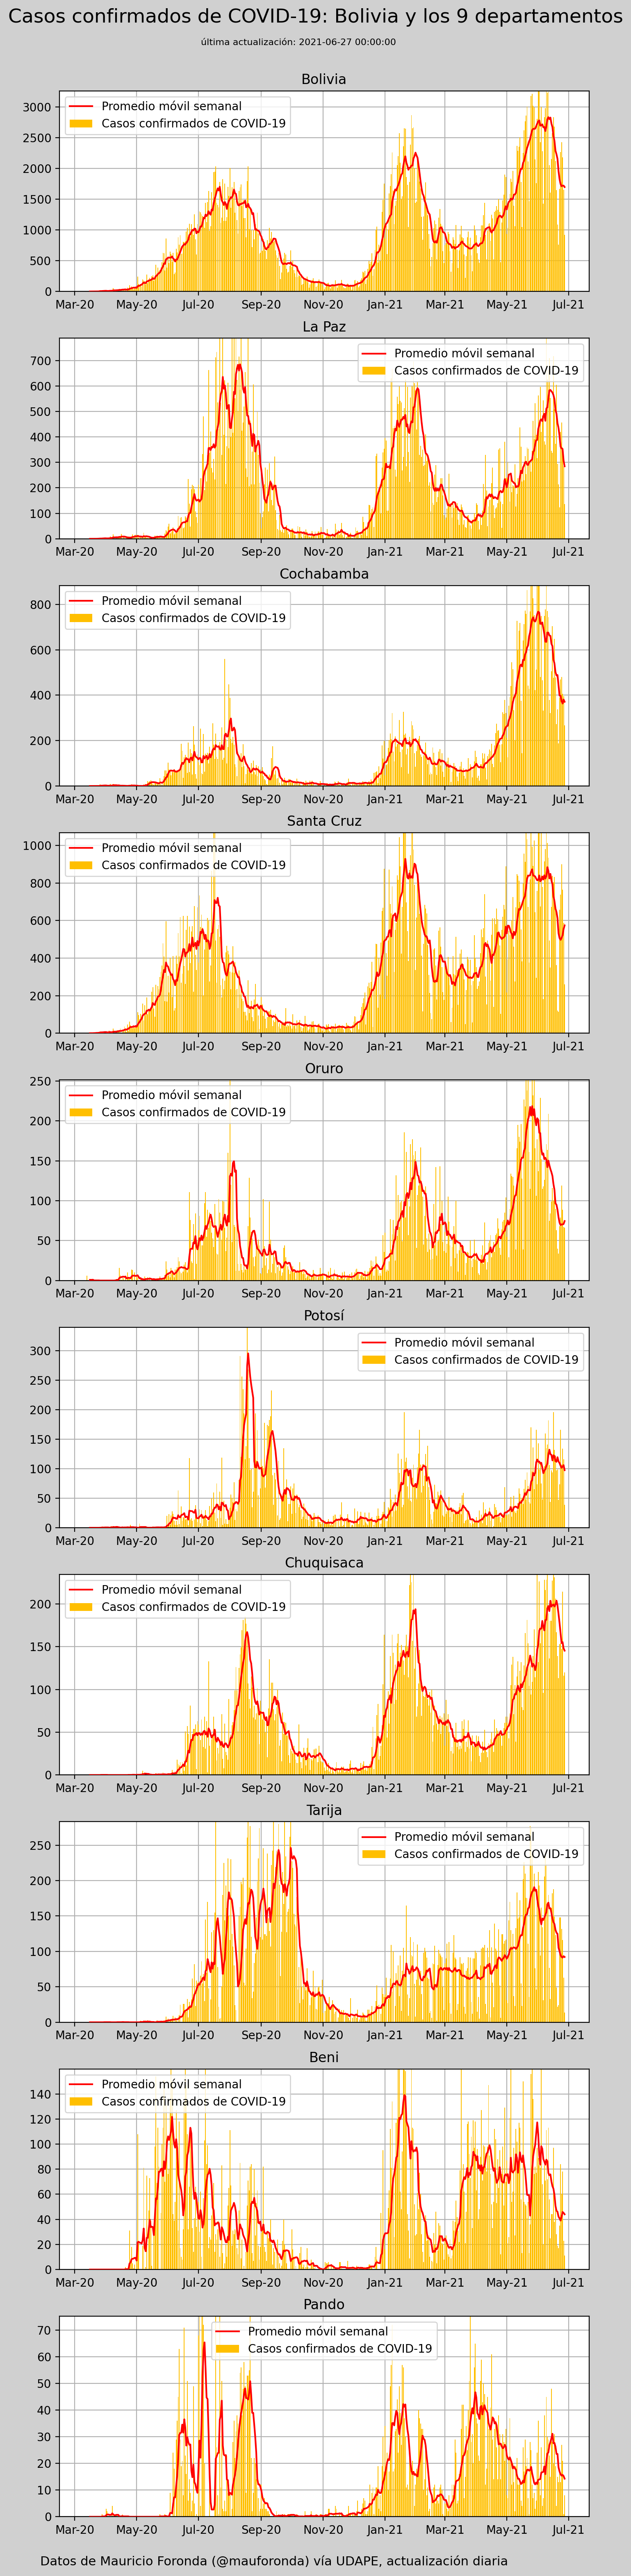

In [8]:
fig, axs = plt.subplots(10,1, figsize = (7,30), dpi=200)
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Casos confirmados de COVID-19: Bolivia y los 9 departamentos", fontsize= 17, y=1.03)
fig.text(0.02,-.01,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", fontsize=11)
fig.text(.3, 1.015,"última actualización: {}".format(casos_diarios.index[-1]), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(casos_diarios.index, casos_diarios[casos_diarios.columns[i]], color = "#ffbf00", label="Casos confirmados de COVID-19",width = .75, zorder=2)
  axs[i].set_title(casos_diarios.columns[i])
  axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "r", label="Promedio móvil semanal",zorder=3)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))



fig.savefig(directory + "graficas/casos_todos.jpg", bbox_inches="tight")

# Muertes

Muertes diarias y acumuladas

In [9]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias = muertes_diarias[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-06-23       86       4          24          35      8       3   
2021-06-24       85       7          19          37      3       9   
2021-06-25       82       7          20          36      3       2   
2021-06-26       55       7           7          23      6       5   
2021-06-27       30       5          10           4      4       0   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-06-23           6       5     1      0  
2021-06-24           9       1     0      0  
2021-06-25           6       1     6      1  
2021-06-26           3       3     1      0  
2021-06-27           4       1     2      0  

[475 rows x 10 columns]

In [10]:
muertes_diarias7 = muertes_diarias.rolling(7).mean()
muertes_diarias7.tail()

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
2021-06-23  71.857143  5.714286   18.285714   21.714286  5.428571  5.857143   
2021-06-24  70.000000  5.857143   18.714286   21.857143  4.142857  5.571429   
2021-06-25  69.571429  6.000000   18.571429   23.000000  3.714286  4.285714   
2021-06-26  66.142857  6.285714   17.142857   22.428571  3.857143  4.714286   
2021-06-27  64.142857  6.285714   15.857143   22.428571  4.142857  4.000000   

            Chuquisaca    Tarija      Beni     Pando  
2021-06-23    6.857143  4.142857  2.857143  1.000000  
2021-06-24    7.428571  3.428571  2.142857  0.857143  
2021-06-25    7.714286  2.857143  2.428571  1.000000  
2021-06-26    6.000000  2.857143  1.857143  1.000000  
2021-06-27    6.000000  2.428571  2.000000  1.000000

In [11]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-06-23    14702    2273        2452        5099   1096     676   
2021-06-24    14787    2280        2471        5136   1099     685   
2021-06-25    14869    2287        2491        5172   1102     687   
2021-06-26    14924    2294        2498        5195   1108     692   
2021-06-27    14954    2299        2508        5199   1112     692   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-06-23        1135     837   827    307  
2021-06-24        1144     838   827    307  
2021-06-25        1150     839   833    308  
2021-06-26        1153     842   834    308  
2021-06-27        1157     843   836    308  

[475 rows x 10 columns]

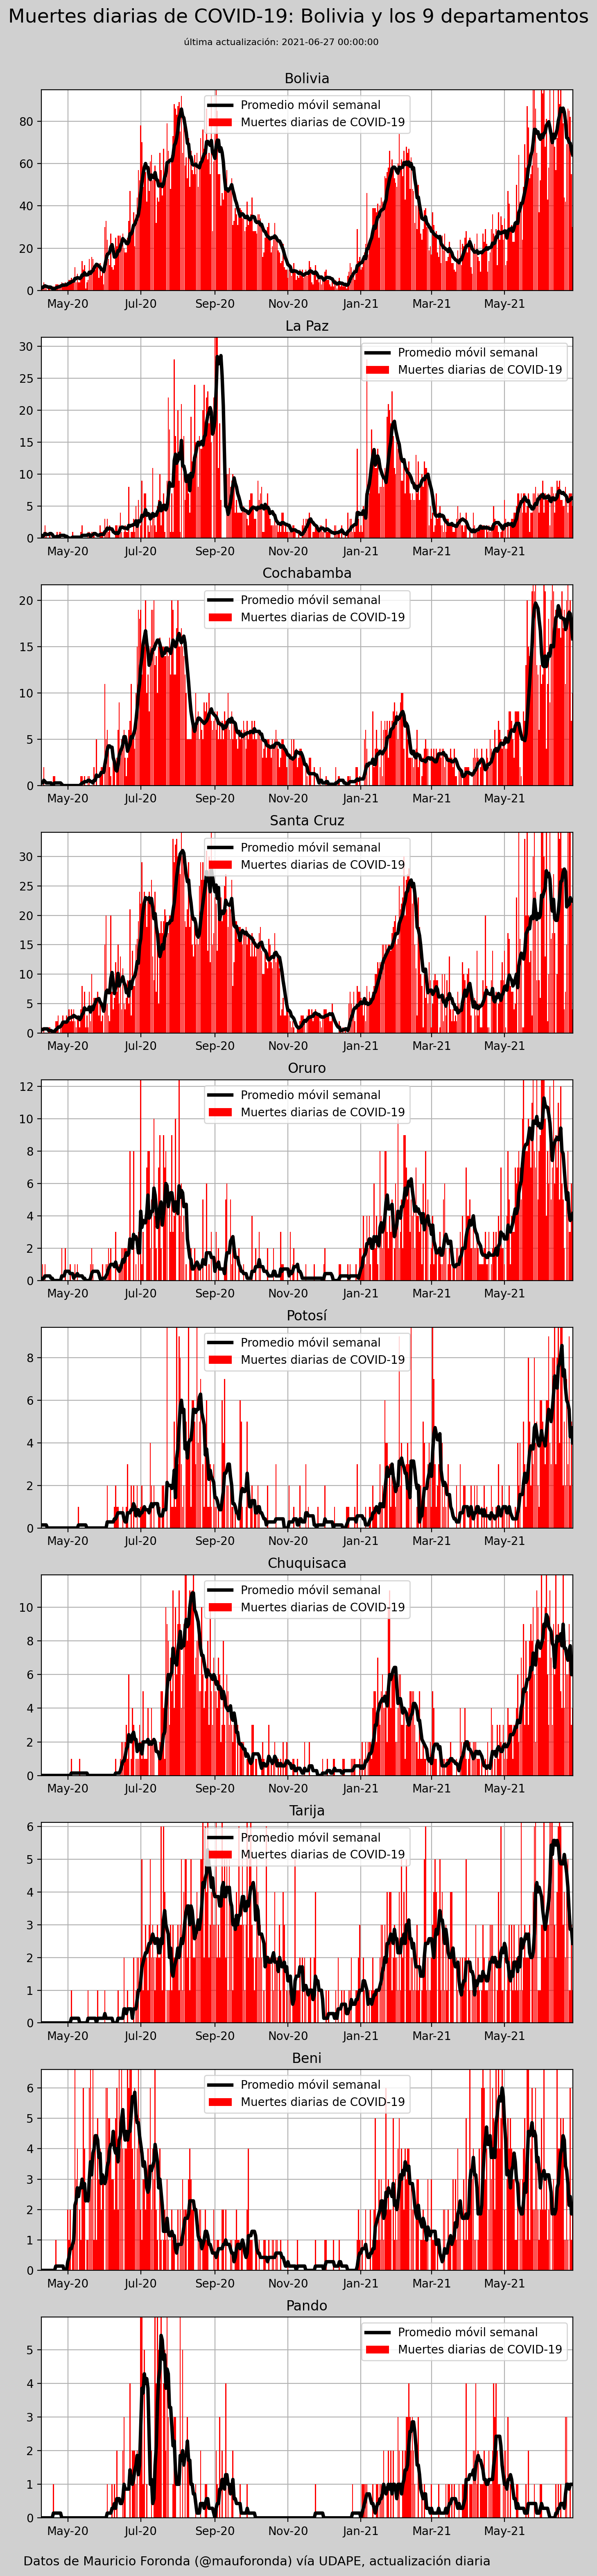

In [12]:
fig, axs = plt.subplots(10,1, figsize = (7,30), dpi=200)
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Muertes diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 17, y=1.03)
fig.text(0.02,-.01,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", fontsize=11)
fig.text(.3, 1.015,"última actualización: {}".format(muertes_diarias.index[-1]), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(muertes_diarias.index, muertes_diarias[muertes_diarias.columns[i]], color = "r", label="Muertes diarias de COVID-19",width=.9,zorder=2)
  axs[i].set_title(muertes_diarias.columns[i])
  axs[i].plot(muertes_diarias.index, muertes_diarias7[muertes_diarias7.columns[i]], color = "black", label="Promedio móvil semanal", zorder=3, linewidth=3)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.1)
  axs[i].set_xlim(muertes_diarias.index[30], muertes_diarias.index[-1])
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))



fig.savefig(directory + "graficas/muertes_todos.jpg", bbox_inches="tight")

# Pruebas
Pruebas procesadas. Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [13]:
pruebas_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
pruebas_edu = pruebas_edu[pruebas_edu.columns].apply(pd.to_numeric, errors = "coerce")
pruebas_edu.index = pd.to_datetime(pruebas_edu.index)

#pruebas_edu



In [14]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [15]:
descartados = pruebas_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9)

descartados.to_csv(directory + "descartados_acumulados.csv")

#descartados

In [16]:
sospechosos = pruebas_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
#for i in range(9):
#    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
sospechosos["Bolivia"] = sospechosos.sum(axis=1)
#sospechosos

In [17]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).interpolate()
pruebas_acum = pruebas_acum[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]


pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum.tail()

Bolivia    La Paz  Cochabamba  Santa Cruz    Oruro   Potosí  \
2021-06-24  1769996.0  354557.0    311761.0    695282.0  70606.0  67060.0   
2021-06-25  1782837.0  357427.0    314184.0    700298.0  71051.0  67421.0   
2021-06-26  1792243.0  360028.0    316470.0    703184.0  71384.0  67782.0   
2021-06-27  1798584.0  361185.0    318613.0    704966.0  71635.0  67895.0   
2021-06-28  1798584.0  361185.0    318613.0    704966.0  71635.0  67895.0   

            Chuquisaca   Tarija     Beni    Pando  
2021-06-24     90147.0  96175.0  61077.0  23331.0  
2021-06-25     90701.0  96862.0  61461.0  23432.0  
2021-06-26     91282.0  97107.0  61543.0  23463.0  
2021-06-27     91892.0  97225.0  61641.0  23532.0  
2021-06-28     91892.0  97225.0  61641.0  23532.0

In [18]:
pruebas_diarias_NaN = pruebas_acum.diff()

#getting rid of negatives
pruebas_diarias = pruebas_diarias_NaN[pruebas_diarias_NaN > 0 ]
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

pruebas_diarias.tail()

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2021-06-24  13275.0  3228.0      2747.0      4595.0  439.0   278.0   
2021-06-25  12841.0  2870.0      2423.0      5016.0  445.0   361.0   
2021-06-26   9406.0  2601.0      2286.0      2886.0  333.0   361.0   
2021-06-27   6341.0  1157.0      2143.0      1782.0  251.0   113.0   
2021-06-28      NaN     NaN         NaN         NaN    NaN     NaN   

            Chuquisaca  Tarija   Beni  Pando  
2021-06-24       450.0   937.0  496.0  105.0  
2021-06-25       554.0   687.0  384.0  101.0  
2021-06-26       581.0   245.0   82.0   31.0  
2021-06-27       610.0   118.0   98.0   69.0  
2021-06-28         NaN     NaN    NaN    NaN

In [19]:
pruebas_diarias7 = pruebas_diarias.rolling(7,min_periods=1).mean()
pruebas_diarias7

Bolivia       La Paz   Cochabamba   Santa Cruz       Oruro  \
2020-05-07           NaN          NaN          NaN          NaN         NaN   
2020-05-08    457.000000   128.000000    52.000000   157.000000    8.000000   
2020-05-09    537.750000   125.500000    49.000000   206.500000    8.000000   
2020-05-10    564.666667   107.333333    38.333333   253.333333   12.000000   
2020-05-11    578.125000   101.250000    31.000000   351.750000   12.250000   
...                  ...          ...          ...          ...         ...   
2021-06-24  10020.571429  2602.428571  2156.285714  3278.142857  340.428571   
2021-06-25   9937.571429  2531.571429  2094.285714  3345.428571  335.000000   
2021-06-26   9983.000000  2450.000000  2185.428571  3417.285714  332.571429   
2021-06-27  10069.142857  2263.000000  2314.571429  3541.142857  336.857143   
2021-06-28  11057.166667  2412.333333  2543.166667  3964.166667  368.666667   

                Potosí  Chuquisaca      Tarija        Beni      Pando  
2020-05-07         NaN         NaN         NaN         NaN        NaN  
2020-05-08   14.000000    1.000000   13.000000   81.000000   3.000000  
2020-05-09   15.000000   14.500000    7.500000   45.000000   4.166667  
2020-05-10   19.666667   19.000000    7.500000   32.333333   4.555556  
2020-05-11   16.500000   17.000000    5.333333   45.250000   4.750000  
...                ...         ...         ...         ...        ...  
2021-06-24  253.571429  594.857143  496.000000  221.285714  77.571429  
2021-06-25  257.571429  556.428571  505.285714  233.285714  78.714286  
2021-06-26  276.714286  506.000000  507.285714  228.142857  79.571429  
2021-06-27  254.000000  538.142857  512.714286  233.000000  75.714286  
2021-06-28  280.500000  573.500000  579.166667  253.500000  82.166667  

[418 rows x 10 columns]

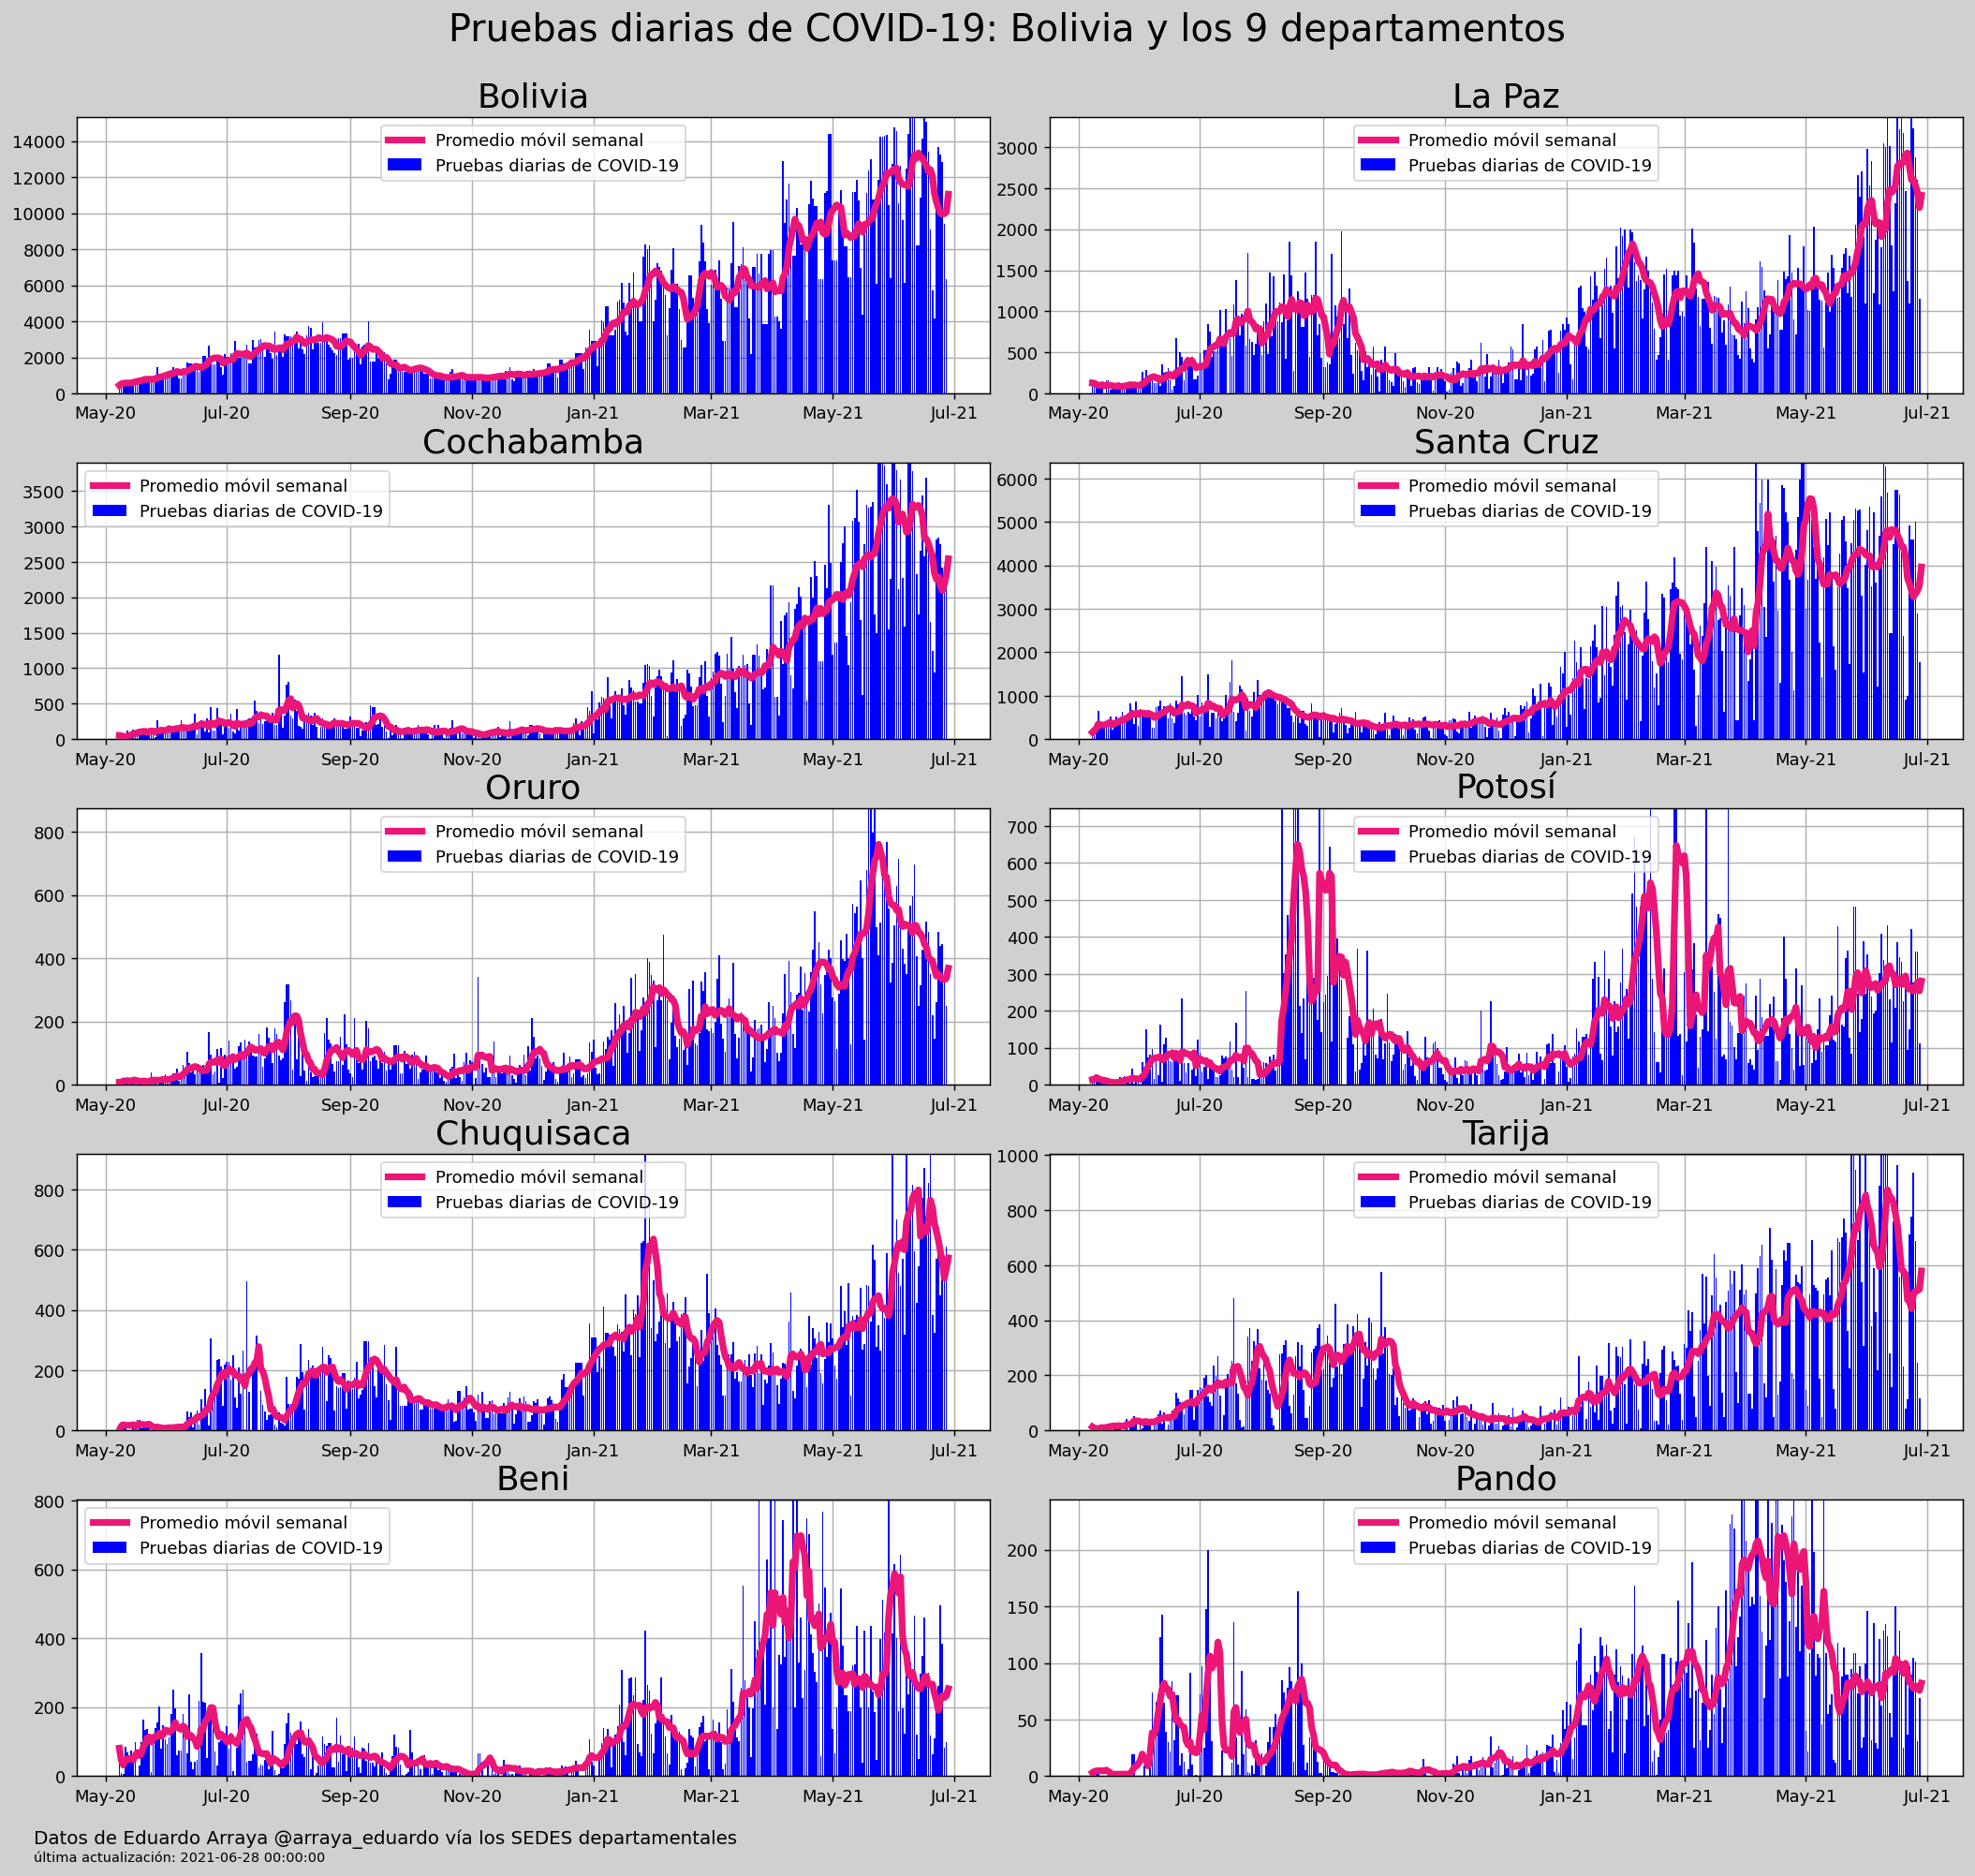

In [20]:
fig, axs = plt.subplots(5,2, figsize = (16,14), dpi=130)
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)
axs = axs.flatten()

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Pruebas diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 22, y=1.055)
fig.text(0.0,-.02,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales", fontsize=11)
fig.text(0, -.03,"última actualización: {}".format(pruebas_diarias.index[-1]), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=1)
  axs[i].bar(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",width=.8,zorder=2)
  axs[i].set_title(pruebas_diarias.columns[i], fontsize = 20)
  axs[i].plot(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "#EB1677", label="Promedio móvil semanal", zorder=3, linewidth=4)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))



fig.savefig(directory + "graficas/pruebas_diarias.jpg", bbox_inches="tight")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

In [21]:
positividad_diaria = casos_diarios / pruebas_diarias
positividad_diaria = positividad_diaria.drop(positividad_diaria.index[0:59])


positividad_diaria.to_csv(directory + "graficas/positividad_diaria.csv")

positividad_diaria

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
2020-05-08  0.404814  0.179688    0.153846    0.439490  0.125000  0.000000   
2020-05-09  0.276475  0.056911    0.108696    0.585938  0.625000  0.000000   
2020-05-10  0.192401  0.112676    0.529412    0.276657  0.150000  0.000000   
2020-05-11  0.444624  0.048193    0.555556    0.293663  0.000000  0.142857   
2020-05-12  0.215036  0.029126    0.179487    0.392308  0.222222  0.000000   
...              ...       ...         ...         ...       ...       ...   
2021-06-24  0.183051  0.141574    0.175100    0.195865  0.271071  0.384892   
2021-06-25  0.169924  0.125087    0.167974    0.152313  0.200000  0.371191   
2021-06-26  0.175739  0.109189    0.173228    0.203396  0.201201  0.321330   
2021-06-27  0.145403  0.117545    0.125058    0.145903  0.262948  0.345133   
2021-06-28       NaN       NaN         NaN         NaN       NaN       NaN   

            Chuquisaca    Tarija      Beni     Pando  
2020-05-08    0.000000  0.230769  1.000000  0.000000  
2020-05-09    0.107143  0.500000  0.000000  0.000000  
2020-05-10    0.035714       NaN  0.285714  0.000000  
2020-05-11    0.000000  0.000000  0.892857  0.000000  
2020-05-12         NaN  0.136364  0.000000       NaN  
...                ...       ...       ...       ...  
2021-06-24    0.326667  0.140875  0.120968  0.257143  
2021-06-25    0.386282  0.168850  0.203125  0.207921  
2021-06-26    0.199656  0.257143  0.280488  0.032258  
2021-06-27    0.196721  0.118644  0.112245  0.115942  
2021-06-28         NaN       NaN       NaN       NaN  

[417 rows x 10 columns]

In [22]:
# positividad_diaria.plot(figsize = (20,7))
# plt.ylim(0,1)
# plt.title("Positividad diaria de pruebas COVID-19 en Bolivia")

In [23]:
positividad_diaria_adj = positividad_diaria.rolling(7,min_periods=1).mean()


positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
2020-05-08  0.404814  0.179688    0.153846    0.439490  0.125000  0.000000   
2020-05-09  0.340645  0.118299    0.131271    0.512714  0.375000  0.000000   
2020-05-10  0.291230  0.116425    0.263985    0.434028  0.300000  0.000000   
2020-05-11  0.329579  0.099367    0.336877    0.398937  0.225000  0.035714   
2020-05-12  0.306670  0.085319    0.305399    0.397611  0.224444  0.028571   
...              ...       ...         ...         ...       ...       ...   
2021-06-24  0.173740  0.135667    0.183175    0.147754  0.210768  0.418317   
2021-06-25  0.175472  0.137706    0.183270    0.148926  0.212720  0.419007   
2021-06-26  0.174672  0.126102    0.184439    0.156161  0.215749  0.403866   
2021-06-27  0.168406  0.125863    0.163448    0.158113  0.227456  0.401175   
2021-06-28  0.165725  0.120871    0.157462    0.165356  0.226553  0.385582   

            Chuquisaca    Tarija      Beni     Pando  
2020-05-08    0.000000  0.230769  1.000000  0.000000  
2020-05-09    0.053571  0.365385  0.500000  0.000000  
2020-05-10    0.047619  0.365385  0.428571  0.000000  
2020-05-11    0.035714  0.243590  0.544643  0.000000  
2020-05-12    0.035714  0.216783  0.435714  0.000000  
...                ...       ...       ...       ...  
2021-06-24    0.279934  0.204973  0.211407  0.206964  
2021-06-25    0.299359  0.200845  0.215663  0.207481  
2021-06-26    0.302338  0.207277  0.221834  0.189232  
2021-06-27    0.278864  0.184940  0.195459  0.183474  
2021-06-28    0.267571  0.180676  0.202277  0.155494  

[417 rows x 10 columns]

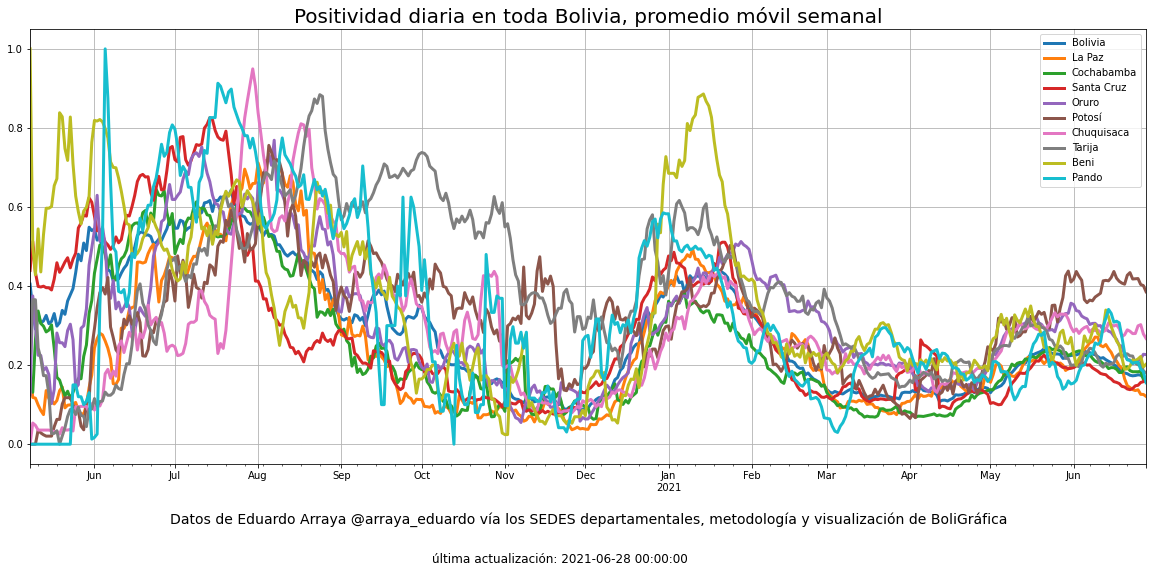

In [24]:
positividad_diaria_adj.plot(figsize = (20,8),zorder=2, linewidth=3)

plt.grid(zorder=1)
plt.title("Positividad diaria en toda Bolivia, promedio móvil semanal", fontsize =20)

plt.text(18442,-.2,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18540, -.3,"última actualización: {}".format(pruebas_diarias.index[-1]), fontsize=12)

plt.savefig(directory + "graficas/positividad_diaria_todos.jpg", dpi=120)

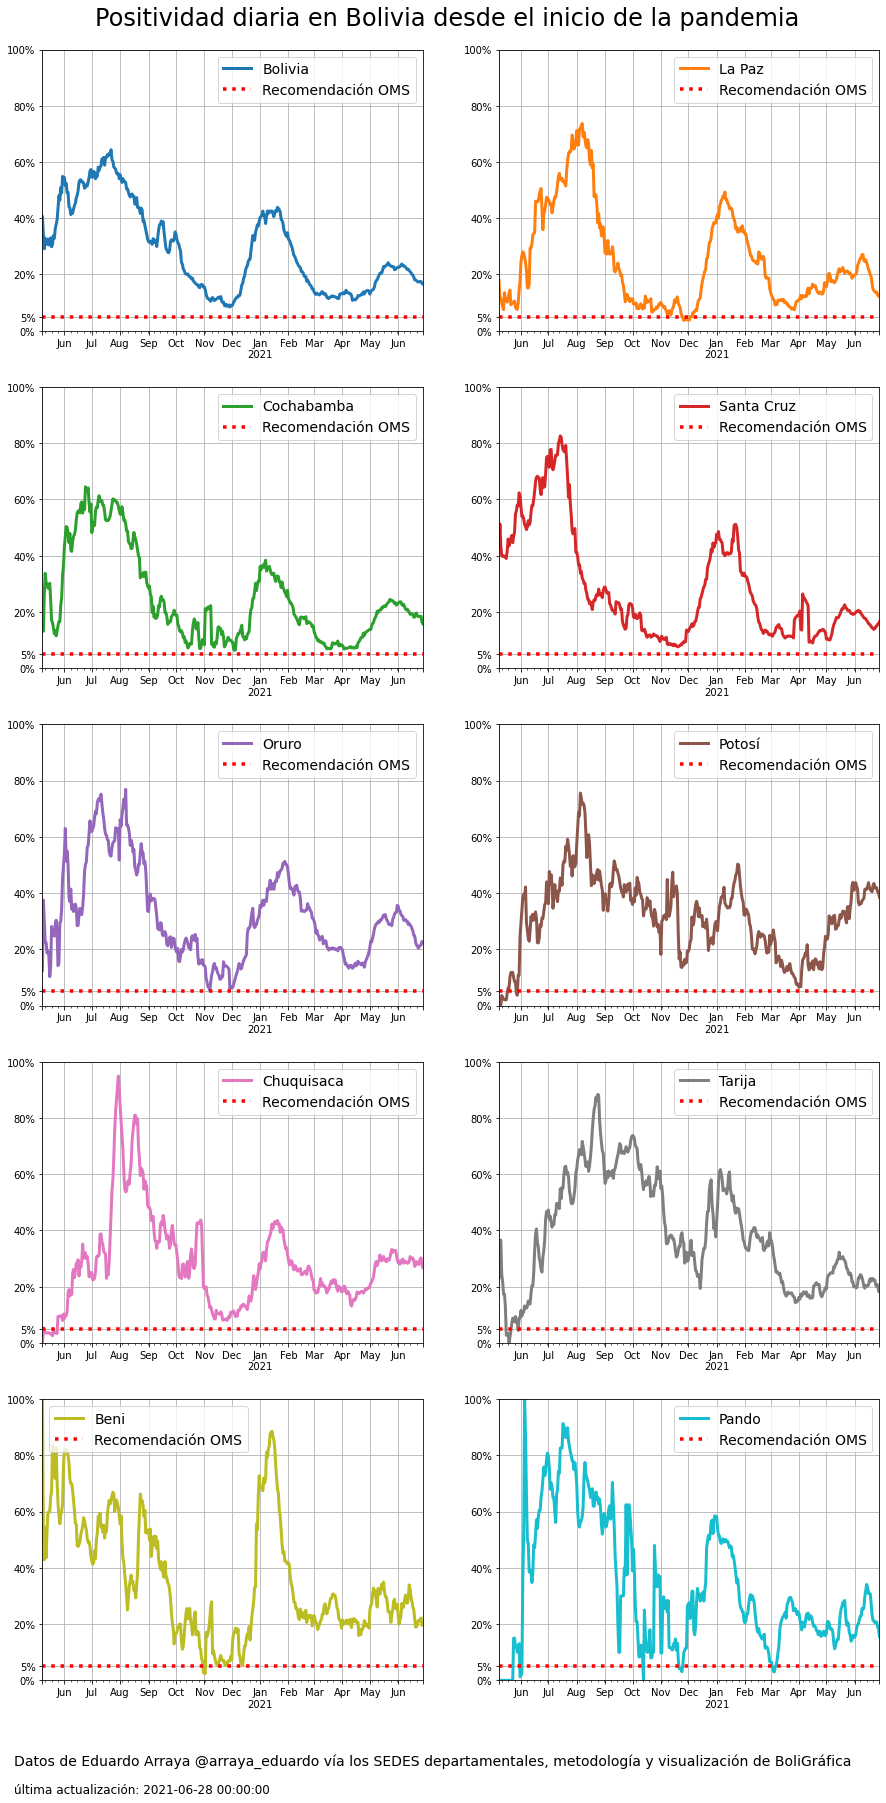

In [25]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(5,2), sharey=False, sharex=False, figsize = (15,30), linewidth = 3)

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde el inicio de la pandemia', y=.9, fontsize = 24)
axs = axs.flatten()

for i in range(10):
  axs[i].grid()
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS", linewidth=3.5)
  axs[i].legend(fontsize = 14)
  axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.text(17860,-.3,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(17860, -.4,"última actualización: {}".format(pruebas_diarias.index[-1]), fontsize=12)

plt.savefig(directory + "graficas/positividad_diaria_subplots.jpg", dpi=120)

In [26]:
# axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

# axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
# axs = axs.flatten()

# for i in range(10):
#   axs[i].grid()
#   axs[i].set_ylim(0,1)
#   axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
#   axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
#   axs[i].legend()
#   axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])


# plt.savefig(directory + "positividad_2021.jpg")

#MIX

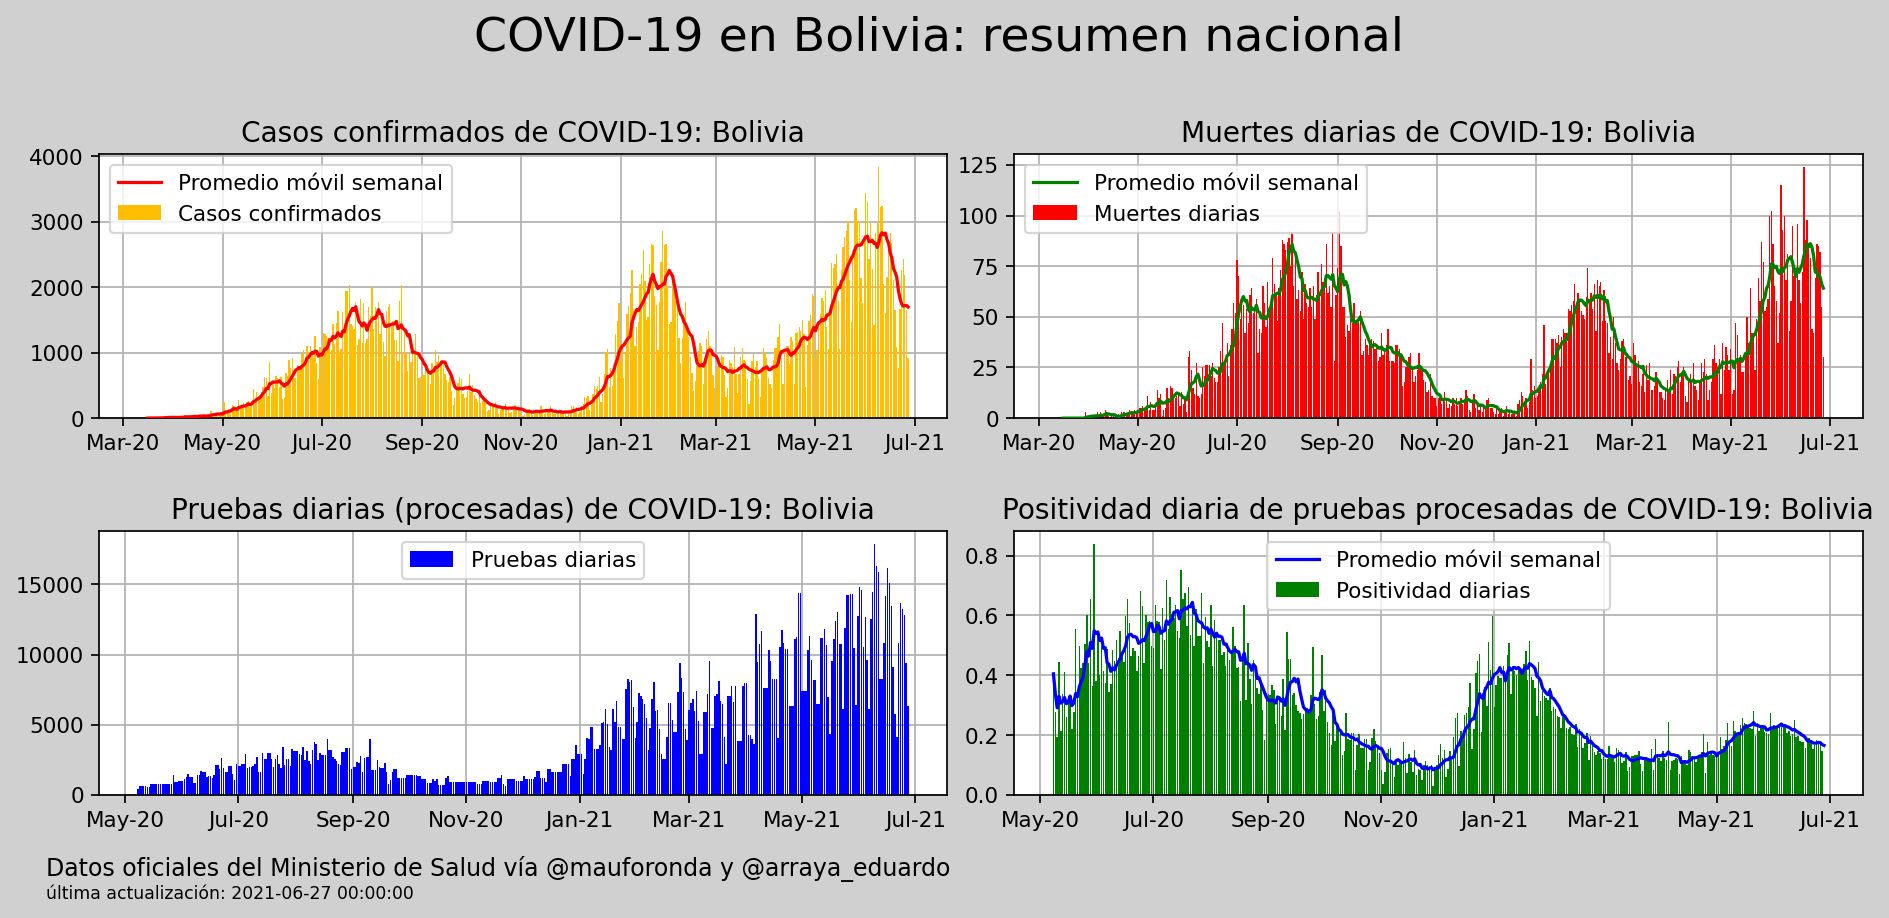

In [27]:
fig, axs = plt.subplots(2,2, figsize = (12,5), dpi=155)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("COVID-19 en Bolivia: resumen nacional", fontsize= 22, y=1.06)
fig.text(0.02,-.05,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=11)
fig.text(.02, -.08,"última actualización: {}".format(muertes_diarias.index[-1]), fontsize=8)

axs[0].grid(zorder=3)
axs[0].set_title("Casos confirmados de COVID-19: Bolivia", fontsize=13) 
axs[0].bar(casos_diarios.index, casos_diarios.Bolivia, color = "#ffbf00", label="Casos confirmados",width=.8,zorder=2)
axs[0].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "r", label="Promedio móvil semanal", zorder=3)
axs[0].set_facecolor(background_color2)
#axs[0].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[1].grid(zorder=3)
axs[1].set_title("Muertes diarias de COVID-19: Bolivia", fontsize=13) 
axs[1].bar(muertes_diarias.index, muertes_diarias.Bolivia, color = "r", label="Muertes diarias",width=.8,zorder=2)
axs[1].plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "g", label="Promedio móvil semanal", zorder=3)
axs[1].set_facecolor(background_color2)
#axs[1].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.15)
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[2].grid(zorder=3)
axs[2].set_title("Pruebas diarias (procesadas) de COVID-19: Bolivia", fontsize=13) 
axs[2].bar(pruebas_diarias.index, pruebas_diarias.Bolivia, color = "b", label="Pruebas diarias",width=.8,zorder=2)
#axs[2].plot(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[1]], color = "g", label="Promedio móvil semanal", zorder=3)
axs[2].set_facecolor(background_color2)
#axs[2].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
axs[2].legend()
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[3].grid(zorder=3)
axs[3].set_title("Positividad diaria de pruebas procesadas de COVID-19: Bolivia", fontsize=13) 
axs[3].bar(positividad_diaria.index, positividad_diaria.Bolivia, color = "g", label="Positividad diarias",width=.8,zorder=2)
axs[3].plot(positividad_diaria.index, positividad_diaria_adj.Bolivia, color = "b", label="Promedio móvil semanal", zorder=3)
axs[3].set_facecolor(background_color2)
#axs[3].set_ylim(0,positividad_diaria_adj[positividad_diaria_adj.olumns[i]].max()*1.15)
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)


fig.savefig(directory + "graficas/resumen_nacional.jpg", bbox_inches="tight")

#ACTIVOS


In [28]:
activos = casos_diarios.rolling(14).sum()-muertes_diarias.rolling(14).sum()
activos.index = pd.to_datetime(activos.index)

activos

Bolivia  La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  \
2020-03-10      NaN     NaN         NaN         NaN     NaN     NaN   
2020-03-11      NaN     NaN         NaN         NaN     NaN     NaN   
2020-03-12      NaN     NaN         NaN         NaN     NaN     NaN   
2020-03-13      NaN     NaN         NaN         NaN     NaN     NaN   
2020-03-14      NaN     NaN         NaN         NaN     NaN     NaN   
...             ...     ...         ...         ...     ...     ...   
2021-06-23  28852.0  6395.0      6423.0      8279.0  1235.0  1502.0   
2021-06-24  28038.0  6227.0      6137.0      8146.0  1194.0  1467.0   
2021-06-25  26990.0  5923.0      5801.0      7966.0  1087.0  1425.0   
2021-06-26  26600.0  5495.0      5829.0      8052.0  1079.0  1442.0   
2021-06-27  25942.0  5079.0      5784.0      7958.0  1066.0  1440.0   

            Chuquisaca  Tarija   Beni  Pando  
2020-03-10         NaN     NaN    NaN    NaN  
2020-03-11         NaN     NaN    NaN    NaN  
2020-03-12         NaN     NaN    NaN    NaN  
2020-03-13         NaN     NaN    NaN    NaN  
2020-03-14         NaN     NaN    NaN    NaN  
...                ...     ...    ...    ...  
2021-06-23      2453.0  1589.0  680.0  296.0  
2021-06-24      2346.0  1558.0  670.0  293.0  
2021-06-25      2374.0  1498.0  632.0  284.0  
2021-06-26      2357.0  1484.0  600.0  262.0  
2021-06-27      2307.0  1466.0  586.0  256.0  

[475 rows x 10 columns]

In [29]:
act_colors = []

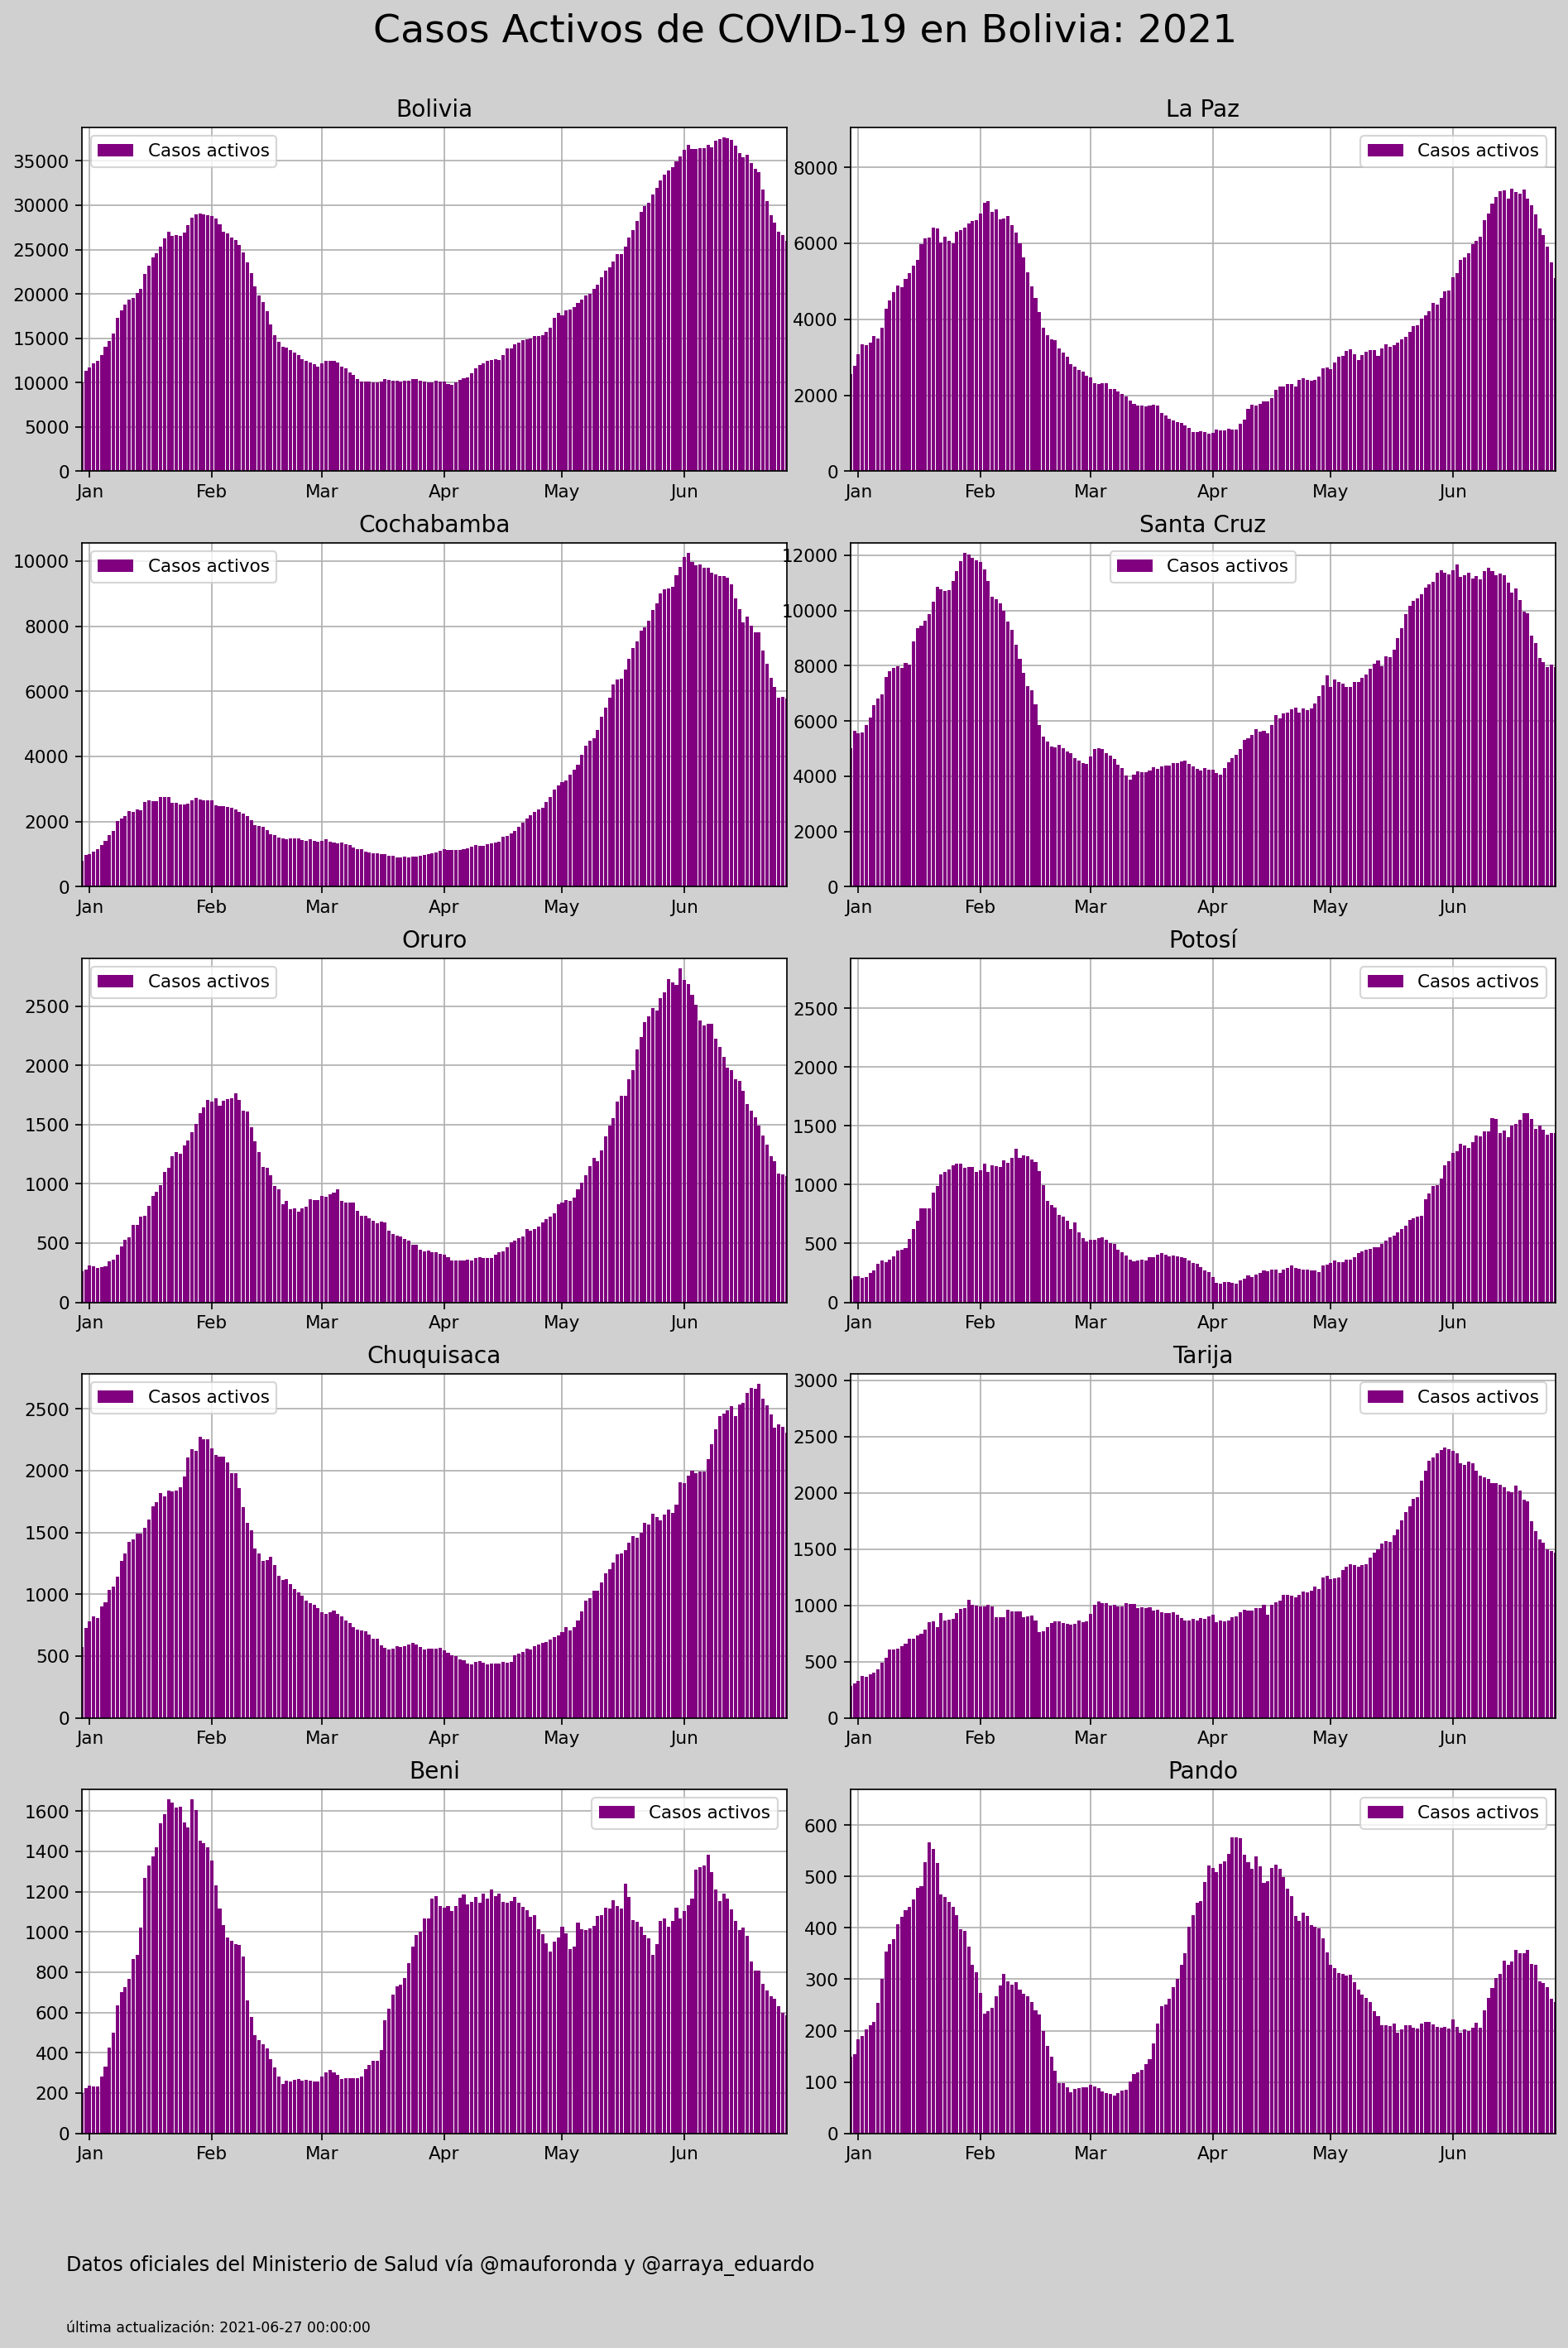

In [30]:
fig, axs = plt.subplots(5,2, figsize = (12,16), dpi=155)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Casos Activos de COVID-19 en Bolivia: 2021", fontsize= 22, y=1.05)
fig.text(0.02,-.05,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=11)
fig.text(.02, -.08,"última actualización: {}".format(muertes_diarias.index[-1]), fontsize=8)

for i in range(10):
   axs[i].grid(zorder=3)
   axs[i].set_title(activos.columns[i], fontsize=13) 
   axs[i].bar(activos.index, activos[activos[295:-1].columns[i]], label="Casos activos",width=.85, zorder=2, color = "purple")
   axs[i].set_facecolor(background_color2)
   axs[i].legend()
   axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
   axs[i].set_xlim(activos.index[295], activos.index[-1])
   axs[i].set_ylim(0, activos[activos[295:-1].columns[i]].max() * 1.03)



fig.savefig(directory + "graficas/activos.jpg", bbox_inches="tight")

In [31]:
activos_ultimo = activos[-1:]

activos_ultimo.index = ["Activos por cada 10,000 habitantes"]
habitantes.index = ["Activos por cada 10,000 habitantes"]
activos_ultimo_pc = activos_ultimo / habitantes * 10000
activos_ultimo_pc.T


Activos por cada 10,000 habitantes
Bolivia                              22.325301
La Paz                               17.352238
Cochabamba                           28.506654
Santa Cruz                           23.614243
Oruro                                19.814126
Potosí                               15.964523
Chuquisaca                           36.216641
Tarija                               25.145798
Beni                                 12.208333
Pando                                16.623377

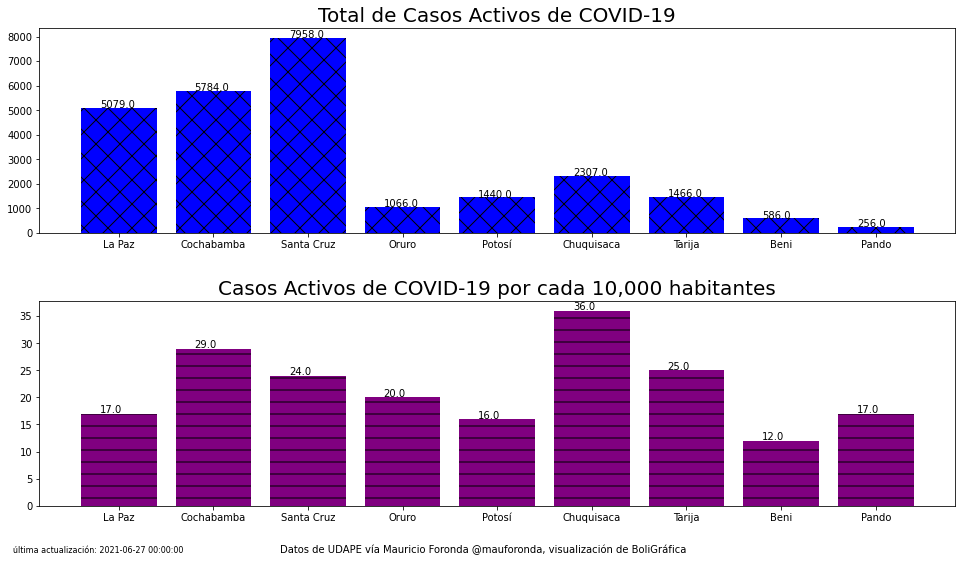

In [32]:
fig, axs = plt.subplots(2,1, figsize=(14,8))


axs[0].bar(activos_ultimo.T.index[1:10], 
           activos_ultimo.T[1:10][activos_ultimo.T.columns[0]],
           color = "b", hatch = "x")
axs[0].set_title("Total de Casos Activos de COVID-19", fontsize = 20)
for p in axs[0].patches:
    axs[0].annotate(
        str(p.get_height()),
        (p.get_x() + 0.2,
        p.get_height()+5))



axs[1].bar(activos_ultimo_pc.T.index[1:10], 
           activos_ultimo_pc.T.round(decimals=0)[1:10]["Activos por cada 10,000 habitantes"],
           color = "purple", hatch = "-")
axs[1].set_title("Casos Activos de COVID-19 por cada 10,000 habitantes", fontsize = 20)
for p in axs[1].patches:
    axs[1].annotate(
        str(p.get_height()),
        (p.get_x() + 0.2,
        p.get_height()+.15))
    
fig.tight_layout(pad=3)

fig.text(0.3,0,"Datos de UDAPE vía Mauricio Foronda @mauforonda, visualización de BoliGráfica")
fig.text(.036, -.0,"última actualización: {}".format(muertes_diarias.index[-1]), fontsize=8)


fig.savefig(directory + "graficas/activos_pc.jpg", bbox_inches = "tight")